# 0 Imports

In [389]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier

from sklearn import metrics
from sklearn.metrics import plot_confusion_matrix


# 1. Import data

In [390]:
#Read train csv
data_train = pd.read_csv('train.csv')
data_train = data_train[['selected_text','sentiment']]

#Read test csv
data_test = pd.read_csv('test.csv')
data_test = data_test[['text','sentiment']]
data_test = data_test.rename(columns = {'text':'selected_text'})

#Join 2 sets to split 0.33 data to test
data_total = pd.concat([data_train,data_test])

#split data into train and test
data_train, data_test, y_train, y_test = train_test_split(data_total['selected_text'], data_total['sentiment'], test_size=0.33, random_state=42)

data_train = pd.DataFrame({'selected_text':data_train,'sentiment':y_train})
data_test = pd.DataFrame({'selected_text':data_test,'sentiment':y_test})


#Organize on list
data_train = data_train.dropna(subset = ['selected_text'])
X_train = data_train['selected_text'].to_list()
y_train = data_train['sentiment'].to_list()

# 2. Choose wich vectorization to use

In [392]:
# Fit vectorizer
# elective input on Vectorizer stop_words='english'
cv = CountVectorizer(stop_words = 'english') # Keep this to obtain bag of words vectorization
#cv = TfidfVectorizer(stop_words = 'english') # Keep this to obtain tfidf vectorization

cv.fit(X_train)

#Turn data to vectorial form
X_train_matrix = cv.transform(X_train)
X_train_df = pd.DataFrame(X_train_matrix.toarray(), columns=cv.get_feature_names())

#Show top 10 most repeated or highest ranked words depending on vectorization chosen
sum_words = X_train_df.sum(axis=0)
print("Top 10 words:",sum_words.sort_values(ascending = False)[0:10])

#Apply transformation to test data 
data_test = data_test.dropna(subset = ['selected_text'])
X_test = data_test['selected_text'].to_list()
y_test = data_test['sentiment'].to_list()

X_test_matrix = cv.transform(X_test)
X_test_df = pd.DataFrame(X_test_matrix.toarray(), columns=cv.get_feature_names())

Top 10 words: good     1023
just      956
day       915
love      725
happy     662
like      612
work      503
today     482
going     469
lol       458
dtype: int64


# 3. MLP

accuracy 0.7587689301416707
confusion matrix [[2153  572  180]
 [ 594 3102  483]
 [ 236  404 2511]]


/Users/pablocabargas/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/Users/pablocabargas/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


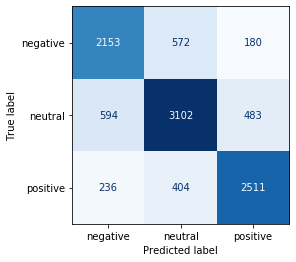

In [393]:
clf = MLPClassifier(random_state=1, max_iter=10)
clf.fit(X_train_matrix, y_train)

y_pred_class = clf.predict(X_test_matrix)

print("accuracy",metrics.accuracy_score(y_test, y_pred_class))
print("confusion matrix",metrics.confusion_matrix(y_test, y_pred_class))

plot_confusion_matrix(clf,X_test_matrix,y_test,cmap = 'Blues',colorbar = False)

# 4. multinomial NB

accuracy: 0.7503663898387885
confusion_matrix [[1708 1038  159]
 [ 235 3606  338]
 [  61  724 2366]]


/Users/pablocabargas/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


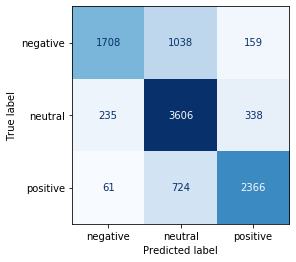

In [394]:
nb = MultinomialNB()
nb.fit(X_train_matrix, y_train)

y_pred_class = nb.predict(X_test_matrix)

print("accuracy:",metrics.accuracy_score(y_test, y_pred_class))

print("confusion_matrix",metrics.confusion_matrix(y_test, y_pred_class))

plot_confusion_matrix(nb,X_test_matrix,y_test,cmap = 'Blues',colorbar = False)

# 5. Logistic Regression

accuracy: 0.7707865168539326
confusion matrix: [[2214  524  167]
 [ 585 3166  428]
 [ 244  398 2509]]


/Users/pablocabargas/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


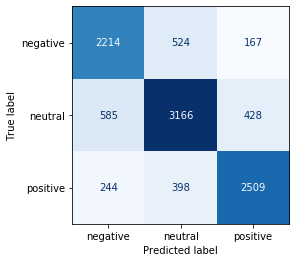

In [395]:

logreg = LogisticRegression(solver='liblinear')
logreg.fit(X_train_matrix, y_train)

y_pred_class = logreg.predict(X_test_matrix)

print("accuracy:",metrics.accuracy_score(y_test, y_pred_class))
print("confusion matrix:",metrics.confusion_matrix(y_test, y_pred_class))

plot_confusion_matrix(logreg,X_test_matrix,y_test,cmap = 'Blues',colorbar = False)